# Window Dressing in Bonds
Window dressing is when portfolio managers artificially reshape their portfolios near reporting dates (usually at the end of the month, quarter or year) to make their holdings look safer, cleaner, or more professional than they actually are.

## Elevator pitch
### What would cause the inefficiency?
The window-dressing inefficiency is caused by large institutional investors making non-economic portfolio changes near the end of a period to improve how their holdings appear in reports. Bond managers rotate into safer, more liquid securities, such as short-duration Tresuries, while selling higher-yielding or longer-duration positions simply to reduce perceived risk on paper. Because these shifts are driven by incentives, compliance rules, and reporting optics rather than fundamentals, they temporarily distort yields, credit spreads, and liquidity, creating a predictable but short-lived mispricing.

### Why it wouldn’t be fully gobbled up by others who are quicker or better informed?
Even well-informed players can’t fully eliminate the effect because the flows are enormous, price-insensitive, and occur exactly when arbitrage capital is constrained. Period-end balance-sheet limits, tighter repo markets, and regulatory ratios all reduce the ability of hedge funds or dealers to take the opposing side. The inefficiencies are small, fleeting, and operationally costly to trade, so professional arbitrageurs only partially offset them. As a result, the forced period-end behavior of large institutions outweighs the corrective pressure from arbitrage, allowing the effect to persist.

### How might a retail investor harness it, on average?
A retail investor can benefit by timing bond allocations around quarter-end, taking advantage of predictable post-window-dressing reversals. High-yield and BBB bonds often get sold off into quarter-end and then recover as institutional flows normalize, offering better entry points just after reporting dates. Conversely, short-duration government bonds tend to be overbought before quarter-end and become slightly cheapter afterward. We're not exploiting arbitrage spreads, we're simply aligning the purchase with the flow-based mean reversion that repeatedly follows institutional window dressing.

## Analysis
Below are the steps we'll follow for the analysis. We'll use the TLT ticker and construct graphs to visualize the window-dressing effect.

1. Load OHLCV returns.
2. Add DOM (day of month) and DOTM (day of trading month) columns.
3. Compute average returns by DOM and DOTM and plot bar charts/histograms.
4. Split observations into First 5 Days / Middle Days / Last 5 Days and compare group statistics.
5. Calculate cumulative mean log-returns by DOM and DOTM and plot.

## Backtest
1. Backtest the signal: short at the start of the trading month (close the early-month short around day 7) and go long around mid-month (DOTM ≈ 15) through month end; compute total and annualized return, annualized volatility, Sharpe ratio, and maximum drawdown.
2. Plot cumulative performance for the strategy, buy-and-hold, and the short/long legs separately.
3. Calculate rolling 1-year metrics (annualized return, volatility, Sharpe) and summarize results.

# Analysis

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:\\Users\\blazo\\Documents\\Misc\\QJ\\quant-journey\\data\\returns\\returns_TLT.csv")

df['Date'] = pd.to_datetime(df['Date'])
df['DOM'] = df['Date'].dt.day
df['DOTM'] = df.groupby(df['Date'].dt.to_period('M')).cumcount() + 1

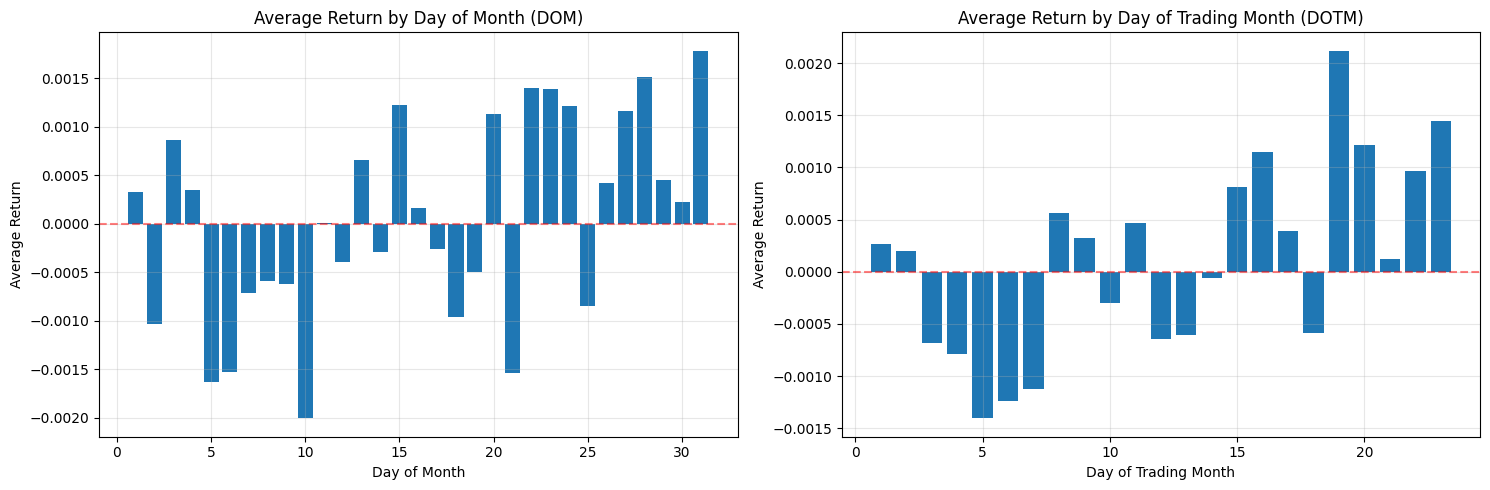

In [17]:
# Calculate average return for each day of the month
avg_return_dom = df.groupby('DOM')['Return'].mean()

# Calculate average return for each day of the trading month
avg_return_dotm = df.groupby('DOTM')['Return'].mean()

# Create histograms for average returns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram for Day of Month
ax1.bar(avg_return_dom.index, avg_return_dom.values)
ax1.set_xlabel('Day of Month')
ax1.set_ylabel('Average Return')
ax1.set_title('Average Return by Day of Month (DOM)')
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)

# Histogram for Day of Trading Month
ax2.bar(avg_return_dotm.index, avg_return_dotm.values)
ax2.set_xlabel('Day of Trading Month')
ax2.set_ylabel('Average Return')
ax2.set_title('Average Return by Day of Trading Month (DOTM)')
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

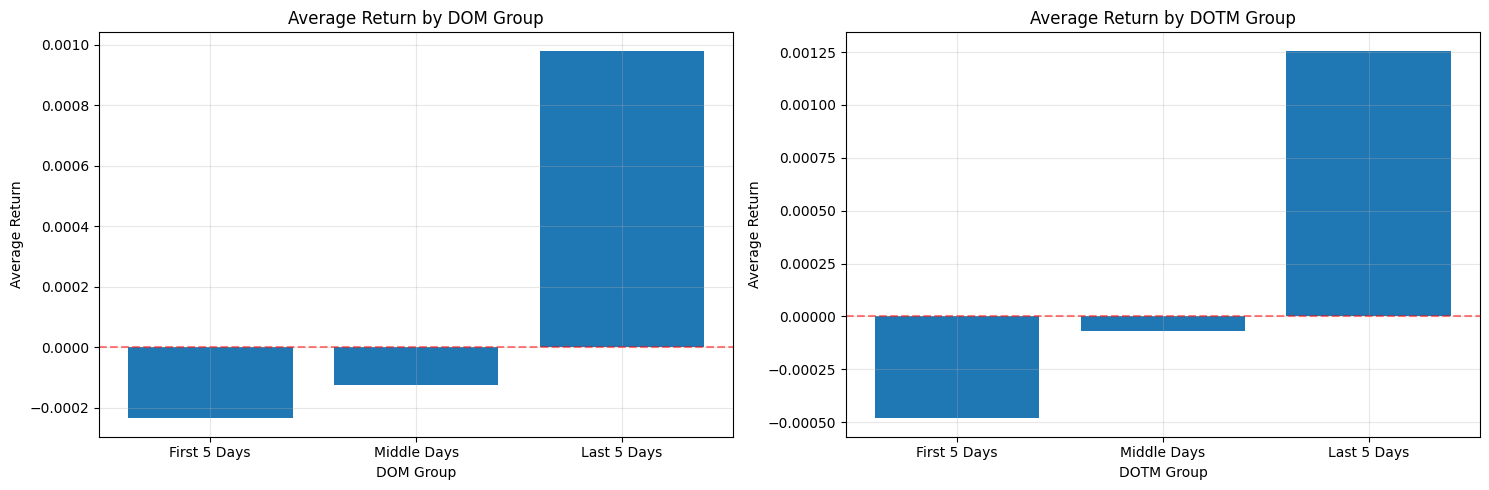

In [25]:
# Split data based on DOM (Day of Month)
df['DOM_Group'] = pd.cut(df['DOM'], bins=[0, 5, 26, 31], labels=['First 5 Days', 'Middle Days', 'Last 5 Days'])

# Split data based on DOTM (Day of Trading Month)
df['DOTM_Group'] = pd.cut(df['DOTM'], bins=[0, 5, 18, 23], labels=['First 5 Days', 'Middle Days', 'Last 5 Days'])

# Calculate average returns for each group
dom_group_returns = df.groupby('DOM_Group', observed=True)['Return'].mean()
dotm_group_returns = df.groupby('DOTM_Group', observed=True)['Return'].mean()

# Create histograms for grouped returns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram for DOM Groups
ax1.bar(range(len(dom_group_returns)), dom_group_returns.values)
ax1.set_xticks(range(len(dom_group_returns)))
ax1.set_xticklabels(dom_group_returns.index)
ax1.set_xlabel('DOM Group')
ax1.set_ylabel('Average Return')
ax1.set_title('Average Return by DOM Group')
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)

# Histogram for DOTM Groups
ax2.bar(range(len(dotm_group_returns)), dotm_group_returns.values)
ax2.set_xticks(range(len(dotm_group_returns)))
ax2.set_xticklabels(dotm_group_returns.index)
ax2.set_xlabel('DOTM Group')
ax2.set_ylabel('Average Return')
ax2.set_title('Average Return by DOTM Group')
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

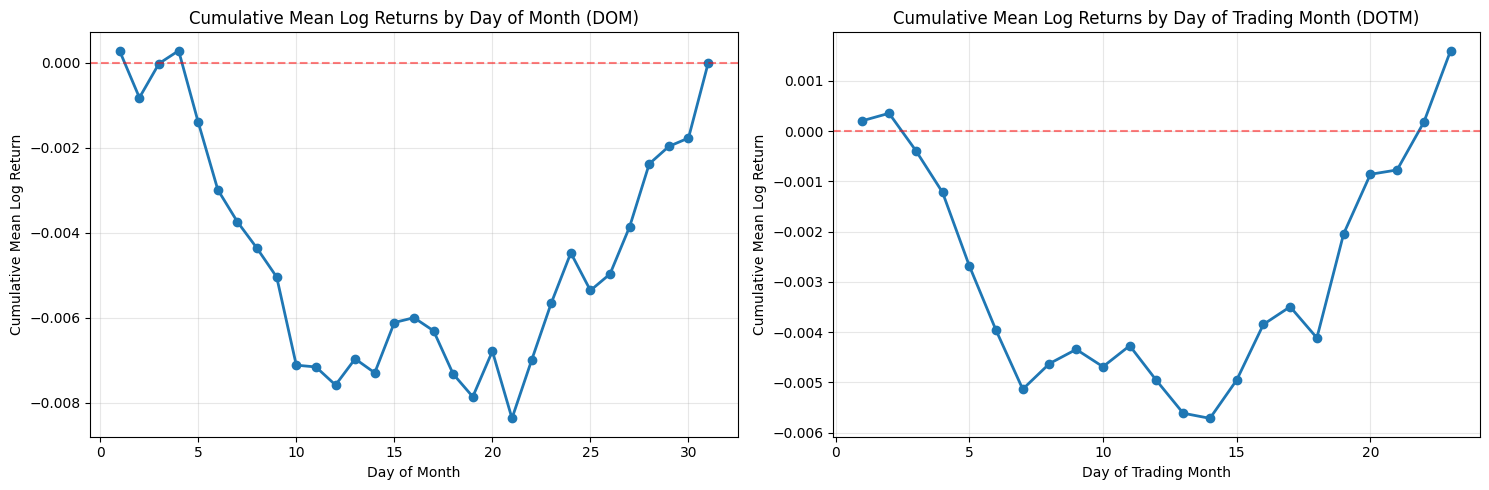

In [19]:
# Calculate cumulative mean log returns by DOM
cumulative_mean_dom = df.groupby('DOM')['LogReturn'].mean().cumsum()

# Calculate cumulative mean log returns by DOTM
cumulative_mean_dotm = df.groupby('DOTM')['LogReturn'].mean().cumsum()

# Create plots for cumulative mean log returns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Day of Month
ax1.plot(cumulative_mean_dom.index, cumulative_mean_dom.values, marker='o', linewidth=2)
ax1.set_xlabel('Day of Month')
ax1.set_ylabel('Cumulative Mean Log Return')
ax1.set_title('Cumulative Mean Log Returns by Day of Month (DOM)')
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)

# Plot for Day of Trading Month
ax2.plot(cumulative_mean_dotm.index, cumulative_mean_dotm.values, marker='o', linewidth=2)
ax2.set_xlabel('Day of Trading Month')
ax2.set_ylabel('Cumulative Mean Log Return')
ax2.set_title('Cumulative Mean Log Returns by Day of Trading Month (DOTM)')
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Backtest

In [ ]:
# Create a copy of the dataframe for backtesting
backtest_df = df.copy()

# Initialize position and portfolio value columns
backtest_df['Position'] = 0  # 0 = no position, -1 = short, 1 = long
backtest_df['Strategy_Return'] = 0.0

# Define the trading strategy based on DOTM
# Short from day 1 to day 6 (close on day 7)
# Long from day 15 to end of month
backtest_df.loc[(backtest_df['DOTM'] >= 1) & (backtest_df['DOTM'] <= 6), 'Position'] = -1
backtest_df.loc[backtest_df['DOTM'] >= 15, 'Position'] = 1

# Calculate strategy returns (position * return)
backtest_df['Strategy_Return'] = backtest_df['Position'] * backtest_df['Return']

# Calculate cumulative returns
backtest_df['Cumulative_Strategy_Return'] = (1 + backtest_df['Strategy_Return']).cumprod()

# Calculate performance metrics
total_return = backtest_df['Cumulative_Strategy_Return'].iloc[-1] - 1
total_profit = total_return * 100  # in percentage

# Calculate annualized return
n_years = (backtest_df['Date'].iloc[-1] - backtest_df['Date'].iloc[0]).days / 365.25
annualized_return = (1 + total_return) ** (1 / n_years) - 1

# Calculate annualized volatility
annual_vol = backtest_df['Strategy_Return'].std() * np.sqrt(252)

# Calculate Sharpe ratio (assuming 0% risk-free rate)
annual_sharpe = annualized_return / annual_vol if annual_vol != 0 else 0

# Calculate maximum drawdown
cumulative_returns = backtest_df['Cumulative_Strategy_Return']
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

# Print results
print("=" * 60)
print("BACKTEST RESULTS")
print("=" * 60)
print(f"Strategy: Short DOTM 1-6, Long DOTM 15+")
print(f"Period: {backtest_df['Date'].iloc[0].date()} to {backtest_df['Date'].iloc[-1].date()}")
print(f"Number of years: {n_years:.2f}")
print("-" * 60)
print(f"Total Return: {total_return * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Annualized Volatility: {annual_vol * 100:.2f}%")
print(f"Sharpe Ratio: {annual_sharpe:.3f}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")
print("=" * 60)

BACKTEST RESULTS
Strategy: Short DOTM 1-6, Long DOTM 15+
Period: 2015-01-05 to 2025-11-19
Number of years: 10.87
------------------------------------------------------------
Total Return: 204.93%
Annualized Return: 10.80%
Annualized Volatility: 11.80%
Sharpe Ratio: 0.915
Maximum Drawdown: -15.61%


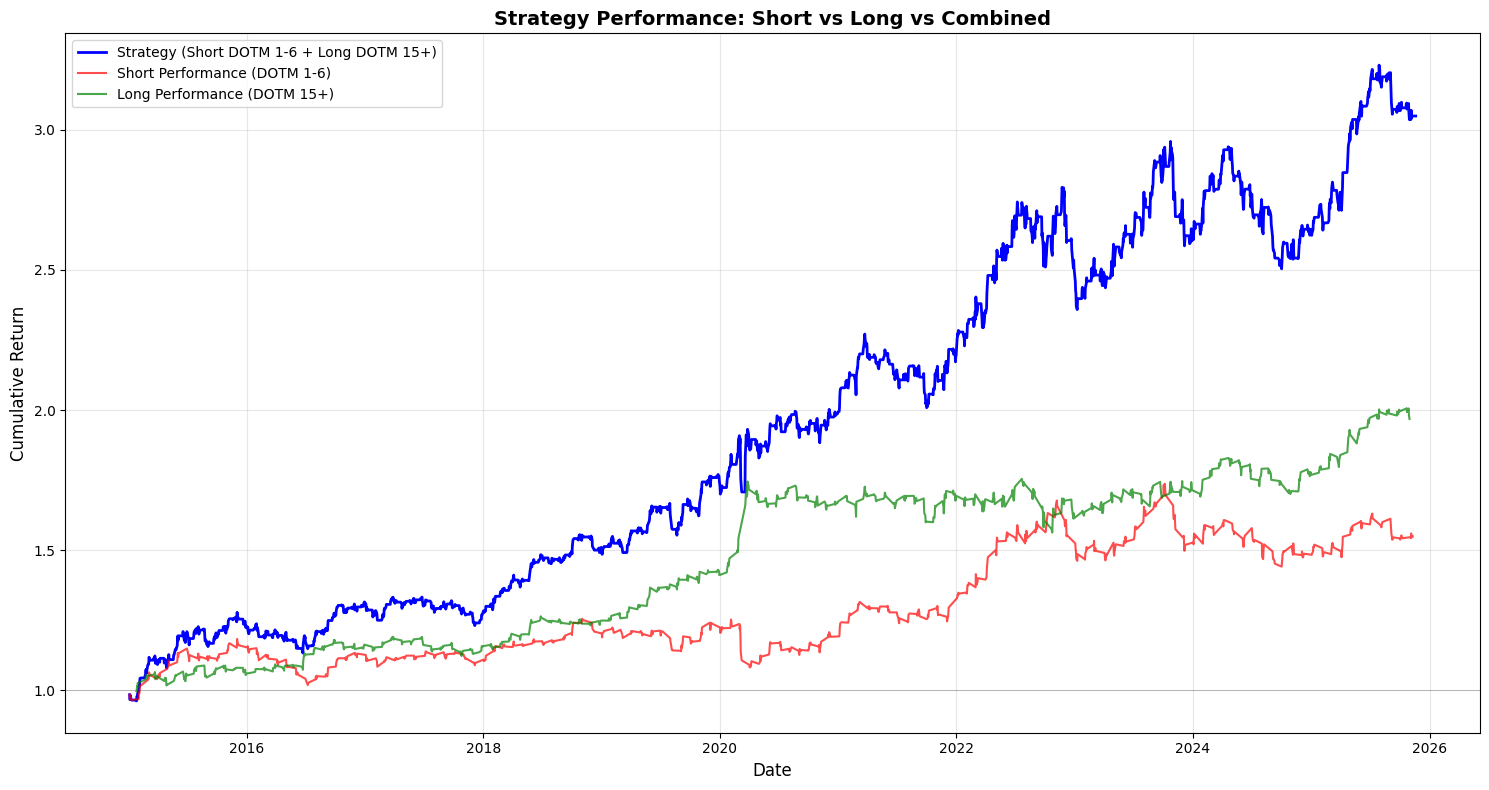

In [23]:
# Calculate separate performance for short and long positions
short_df = backtest_df[backtest_df['Position'] == -1].copy()
long_df = backtest_df[backtest_df['Position'] == 1].copy()

# Calculate cumulative returns for short and long separately
short_df['Cumulative_Short_Return'] = (1 + short_df['Strategy_Return']).cumprod()
long_df['Cumulative_Long_Return'] = (1 + long_df['Strategy_Return']).cumprod()

# Plot the performance
fig, ax = plt.subplots(figsize=(15, 8))

# Plot strategy performance
ax.plot(backtest_df['Date'], backtest_df['Cumulative_Strategy_Return'], 
    label='Strategy (Short DOTM 1-6 + Long DOTM 15+)', linewidth=2, color='blue')

# Plot short performance
ax.plot(short_df['Date'], short_df['Cumulative_Short_Return'], 
    label='Short Performance (DOTM 1-6)', linewidth=1.5, color='red', alpha=0.7)

# Plot long performance
ax.plot(long_df['Date'], long_df['Cumulative_Long_Return'], 
    label='Long Performance (DOTM 15+)', linewidth=1.5, color='green', alpha=0.7)


ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Return', fontsize=12)
ax.set_title('Strategy Performance: Short vs Long vs Combined', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
ax.axhline(y=1, color='black', linestyle='-', alpha=0.3, linewidth=0.5)

plt.tight_layout()
plt.show()

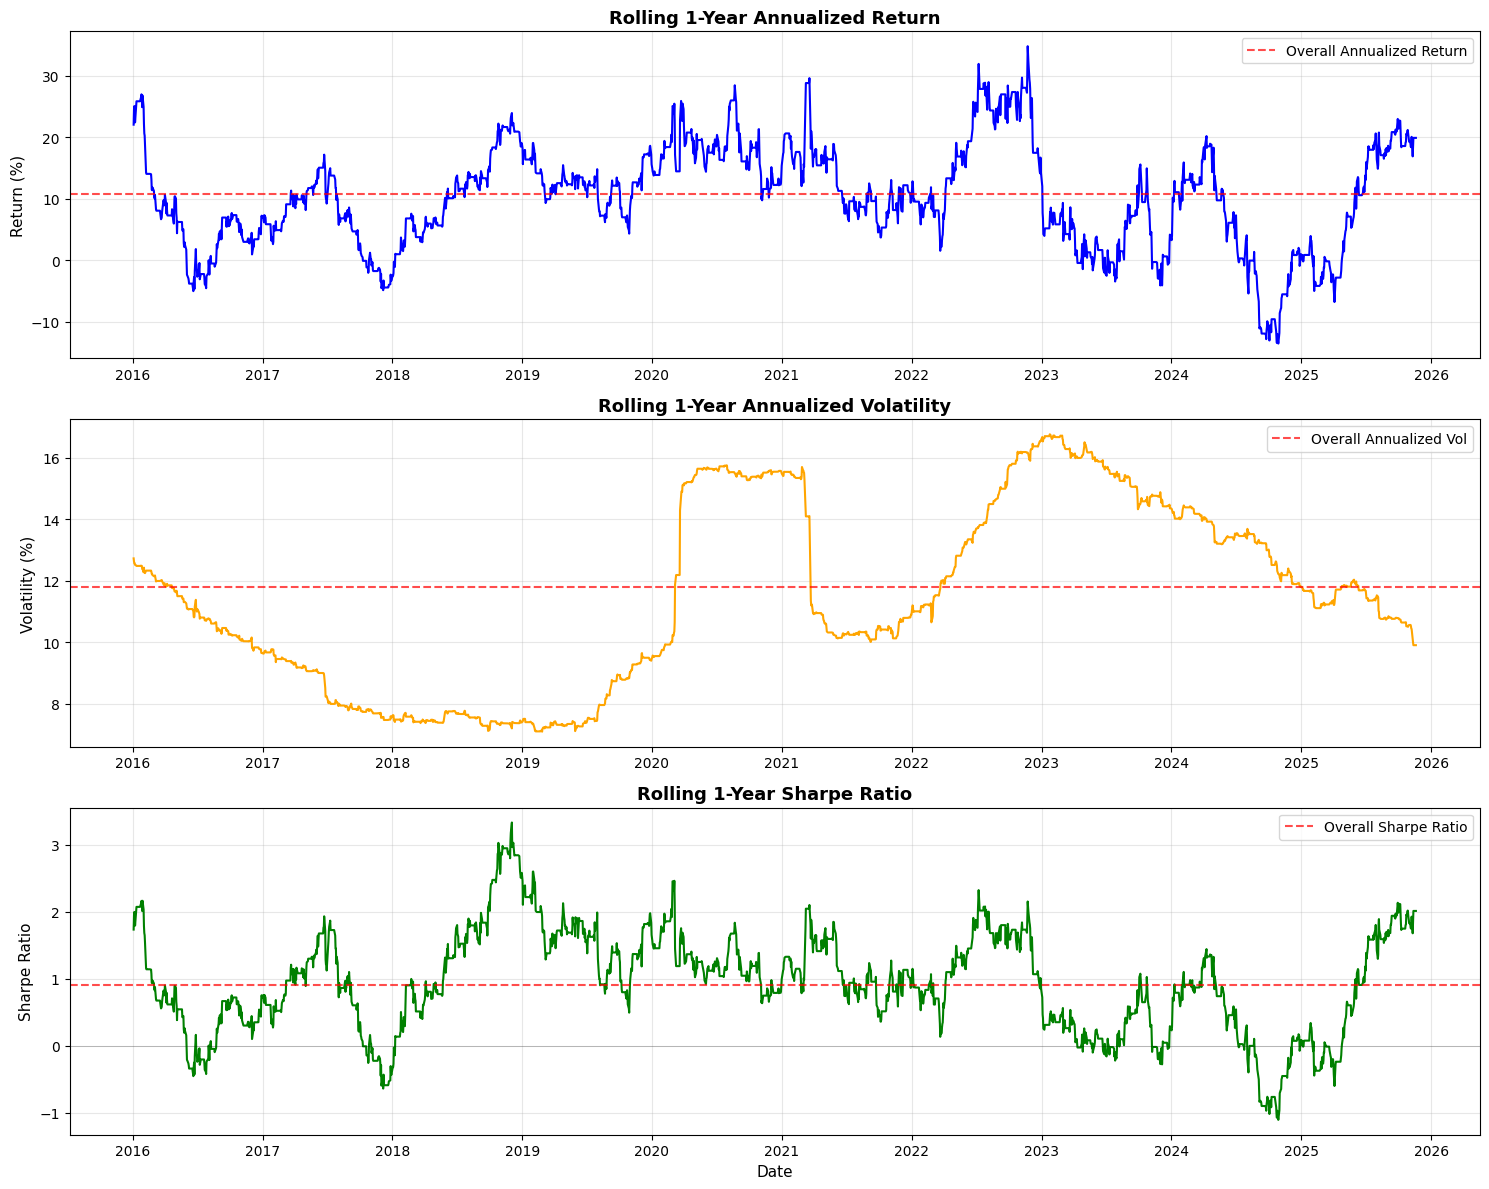

In [24]:
# Calculate rolling metrics with a 252-day window (1 year)
window = 252

# Calculate rolling annualized return
backtest_df['Rolling_Return'] = backtest_df['Strategy_Return'].rolling(window=window).apply(
    lambda x: (1 + x).prod() ** (252 / len(x)) - 1 if len(x) == window else np.nan
)

# Calculate rolling annualized volatility
backtest_df['Rolling_Vol'] = backtest_df['Strategy_Return'].rolling(window=window).std() * np.sqrt(252)

# Calculate rolling Sharpe ratio
backtest_df['Rolling_Sharpe'] = backtest_df['Rolling_Return'] / backtest_df['Rolling_Vol']

# Create plots for rolling metrics
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# Plot rolling annualized return
ax1.plot(backtest_df['Date'], backtest_df['Rolling_Return'] * 100, linewidth=1.5, color='blue')
ax1.axhline(y=annualized_return * 100, color='red', linestyle='--', alpha=0.7, label='Overall Annualized Return')
ax1.set_ylabel('Return (%)', fontsize=11)
ax1.set_title('Rolling 1-Year Annualized Return', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot rolling annualized volatility
ax2.plot(backtest_df['Date'], backtest_df['Rolling_Vol'] * 100, linewidth=1.5, color='orange')
ax2.axhline(y=annual_vol * 100, color='red', linestyle='--', alpha=0.7, label='Overall Annualized Vol')
ax2.set_ylabel('Volatility (%)', fontsize=11)
ax2.set_title('Rolling 1-Year Annualized Volatility', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot rolling Sharpe ratio
ax3.plot(backtest_df['Date'], backtest_df['Rolling_Sharpe'], linewidth=1.5, color='green')
ax3.axhline(y=annual_sharpe, color='red', linestyle='--', alpha=0.7, label='Overall Sharpe Ratio')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.5)
ax3.set_xlabel('Date', fontsize=11)
ax3.set_ylabel('Sharpe Ratio', fontsize=11)
ax3.set_title('Rolling 1-Year Sharpe Ratio', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()